In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from category_encoders import TargetEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score, KFold, GridSearchCV, RandomizedSearchCV, train_test_split

df = pd.read_csv('data.csv')

X = df.drop('overall_rating', axis=1)
y = df['overall_rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [6]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def evaluate_model(model, X, y):
    y_pred = model.predict(X)
    mse = mean_squared_error(y, y_pred)
    mae = mean_absolute_error(y, y_pred)
    r2 = r2_score(y, y_pred)
    return mse, mae, r2

def print_metrics(mse, mae, r2):
    print(f'MSE: {mse:.3f}')
    print(f'MAE: {mae:.3f}')
    print(f'R2: {r2:.3f}')

# AdaBoost

### Train AdaBoost in which base estimator used is Decision Stump (A node with 2 leaves)

In [7]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

pipeline = Pipeline([
    ('model', AdaBoostRegressor(
        estimator=DecisionTreeRegressor(max_depth=1, random_state=42),
        random_state=42,
    ))
])
pipeline.fit(X_train, y_train)

Pipeline(steps=[('model',
                 AdaBoostRegressor(estimator=DecisionTreeRegressor(max_depth=1,
                                                                   random_state=42),
                                   random_state=42))])

In [8]:
mse_train, mae_train, r2_train = evaluate_model(pipeline, X_train, y_train)
print('Training set:')
print_metrics(mse_train, mae_train, r2_train)

mse_test, mae_test, r2_test = evaluate_model(pipeline, X_test, y_test)
print('\nTest set:')
print_metrics(mse_test, mae_test, r2_test)

Training set:
MSE: 22.645
MAE: 3.711
R2: 0.526

Test set:
MSE: 22.970
MAE: 3.732
R2: 0.533


In [9]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

cv = KFold(n_splits=5, shuffle=True, random_state=42)

r2_scores = cross_val_score(pipeline, X, y, cv=cv, scoring='r2', n_jobs=-1)
print(f"R^2 scores: {r2_scores}")
print(f"R^2 trung bình: {r2_scores.mean():.3f} ± {r2_scores.std():.3f}")
print()

mse_scores = cross_val_score(pipeline, X, y, cv=cv, scoring='neg_mean_squared_error', n_jobs=-1)
mse_scores = -mse_scores
print(f"MSE: {mse_scores}")
print(f"MSE trung bình: {mse_scores.mean():.3f}" + u"\u00B1" + f" {mse_scores.std():.3f}")
print()

mae_scores = cross_val_score(pipeline, X, y, cv=cv, scoring='neg_mean_absolute_error', n_jobs=-1)
mae_scores = -mae_scores
print(f"MAE: {mae_scores}")
print(f"MAE trung bình: {mae_scores.mean():.3f} ± {mae_scores.std():.3f}")

R^2 scores: [0.50992156 0.49613329 0.48581638 0.45971426 0.50539177]
R^2 trung bình: 0.491 ± 0.018

MSE: [24.16459145 23.56435108 24.500844   26.7659295  23.58117473]
MSE trung bình: 24.515± 1.180

MAE: [3.8214716  3.7726958  3.86320247 4.01117066 3.73504913]
MAE trung bình: 3.841 ± 0.096


### Tuning n_estimators in Ada

In [10]:
pipeline = Pipeline([
    ('model', AdaBoostRegressor(
        estimator=DecisionTreeRegressor(
            max_depth=1, 
            random_state=42
        ),
        random_state=42,
        n_estimators=20
    ))
])
pipeline.fit(X_train, y_train)

Pipeline(steps=[('model',
                 AdaBoostRegressor(estimator=DecisionTreeRegressor(max_depth=1,
                                                                   random_state=42),
                                   n_estimators=20, random_state=42))])

In [11]:
mse_train, mae_train, r2_train = evaluate_model(pipeline, X_train, y_train)
print('Training set:')
print_metrics(mse_train, mae_train, r2_train)

mse_test, mae_test, r2_test = evaluate_model(pipeline, X_test, y_test)
print('\nTest set:')
print_metrics(mse_test, mae_test, r2_test)

Training set:
MSE: 23.260
MAE: 3.765
R2: 0.513

Test set:
MSE: 23.351
MAE: 3.763
R2: 0.525


In [12]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

cv = KFold(n_splits=5, shuffle=True, random_state=42)

r2_scores = cross_val_score(pipeline, X, y, cv=cv, scoring='r2', n_jobs=-1)
print(f"R^2 scores: {r2_scores}")
print(f"R^2 trung bình: {r2_scores.mean():.3f} ± {r2_scores.std():.3f}")
print()

mse_scores = cross_val_score(pipeline, X, y, cv=cv, scoring='neg_mean_squared_error', n_jobs=-1)
mse_scores = -mse_scores
print(f"MSE: {mse_scores}")
print(f"MSE trung bình: {mse_scores.mean():.3f}" + u"\u00B1" + f" {mse_scores.std():.3f}")
print()

mae_scores = cross_val_score(pipeline, X, y, cv=cv, scoring='neg_mean_absolute_error', n_jobs=-1)
mae_scores = -mae_scores
print(f"MAE: {mae_scores}")
print(f"MAE trung bình: {mae_scores.mean():.3f} ± {mae_scores.std():.3f}")

R^2 scores: [0.49821031 0.45046793 0.46863669 0.46081996 0.46432475]
R^2 trung bình: 0.468 ± 0.016

MSE: [24.742045   25.69998442 25.31945592 26.71115281 25.53910565]
MSE trung bình: 25.602± 0.642

MAE: [3.85288353 3.94845055 3.92221743 3.9923762  3.89497439]
MAE trung bình: 3.922 ± 0.047


In [13]:
from sklearn.linear_model import LinearRegression

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', AdaBoostRegressor(
        estimator=DecisionTreeRegressor(random_state=42, max_depth=17, ccp_alpha=0.0004872495324492965,
                                        min_samples_split=35, min_samples_leaf=9),
        random_state=42,
        n_estimators=30,
        # learning_rate=1
    ))
])
pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('model',
                 AdaBoostRegressor(estimator=DecisionTreeRegressor(ccp_alpha=0.0004872495324492965,
                                                                   max_depth=17,
                                                                   min_samples_leaf=9,
                                                                   min_samples_split=35,
                                                                   random_state=42),
                                   n_estimators=30, random_state=42))])

In [14]:
mse_train, mae_train, r2_train = evaluate_model(pipeline, X_train, y_train)
print('Training set:')
print_metrics(mse_train, mae_train, r2_train)

mse_test, mae_test, r2_test = evaluate_model(pipeline, X_test, y_test)
print('\nTest set:')
print_metrics(mse_test, mae_test, r2_test)

Training set:
MSE: 0.829
MAE: 0.751
R2: 0.983

Test set:
MSE: 3.690
MAE: 1.314
R2: 0.925


In [15]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

cv = KFold(n_splits=5, shuffle=True, random_state=42)

r2_scores = cross_val_score(pipeline, X, y, cv=cv, scoring='r2', n_jobs=-1)
print(f"R^2 scores: {r2_scores}")
print(f"R^2 trung bình: {r2_scores.mean():.3f} ± {r2_scores.std():.3f}")
print()

mse_scores = cross_val_score(pipeline, X, y, cv=cv, scoring='neg_mean_squared_error', n_jobs=-1)
mse_scores = -mse_scores
print(f"MSE: {mse_scores}")
print(f"MSE trung bình: {mse_scores.mean():.3f}" + u"\u00B1" + f" {mse_scores.std():.3f}")
print()

mae_scores = cross_val_score(pipeline, X, y, cv=cv, scoring='neg_mean_absolute_error', n_jobs=-1)
mae_scores = -mae_scores
print(f"MAE: {mae_scores}")
print(f"MAE trung bình: {mae_scores.mean():.3f} ± {mae_scores.std():.3f}")

R^2 scores: [0.93233818 0.92000787 0.9255743  0.91607051 0.91796315]
R^2 trung bình: 0.922 ± 0.006

MSE: [3.33624195 3.74099442 3.54638372 4.15789395 3.91122773]
MSE trung bình: 3.739± 0.284

MAE: [1.247656   1.3101129  1.28504056 1.36005434 1.31613787]
MAE trung bình: 1.304 ± 0.037


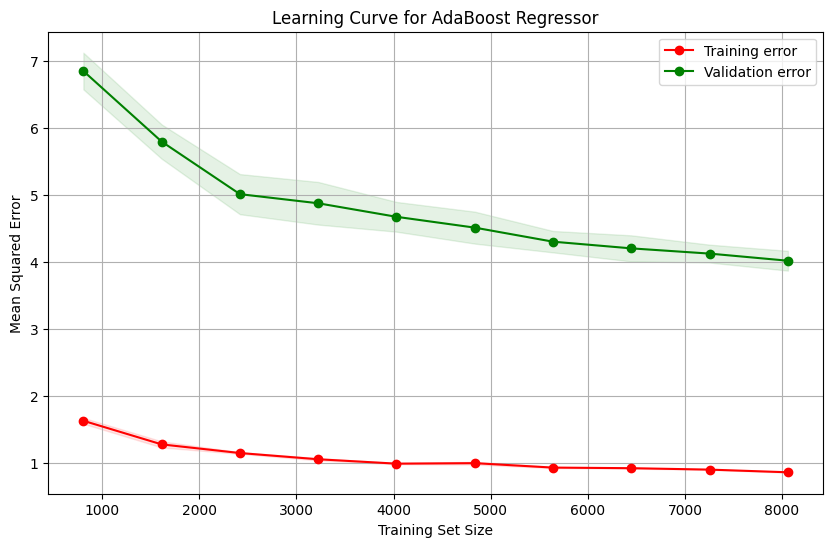

In [16]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    pipeline,
    X_train,
    y_train,
    cv=KFold(n_splits=5, shuffle=True, random_state=42),
    scoring='neg_mean_squared_error',
    train_sizes=np.linspace(0.1, 1.0, 10),
    n_jobs=-1
)

train_scores_mean = -np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = -np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.title("Learning Curve for AdaBoost Regressor")
plt.xlabel("Training Set Size")
plt.ylabel("Mean Squared Error")

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")

plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training error")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Validation error")

plt.legend(loc="best")
plt.grid()
plt.show()

# Gradient Boosting

In [17]:
from sklearn.ensemble import GradientBoostingRegressor

pipeline = Pipeline([
    ('model', GradientBoostingRegressor(random_state=42))
])
pipeline.fit(X_train, y_train)

Pipeline(steps=[('model', GradientBoostingRegressor(random_state=42))])

In [18]:
mse_train, mae_train, r2_train = evaluate_model(pipeline, X_train, y_train)
print('Training set:')
print_metrics(mse_train, mae_train, r2_train)

mse_test, mae_test, r2_test = evaluate_model(pipeline, X_test, y_test)
print('\nTest set:')
print_metrics(mse_test, mae_test, r2_test)

Training set:
MSE: 3.577
MAE: 1.327
R2: 0.925

Test set:
MSE: 3.997
MAE: 1.410
R2: 0.919


In [19]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

cv = KFold(n_splits=5, shuffle=True, random_state=42)

r2_scores = cross_val_score(pipeline, X, y, cv=cv, scoring='r2', n_jobs=-1)
print(f"R^2 scores: {r2_scores}")
print(f"R^2 trung bình: {r2_scores.mean():.3f} ± {r2_scores.std():.3f}")
print()

mse_scores = cross_val_score(pipeline, X, y, cv=cv, scoring='neg_mean_squared_error', n_jobs=-1)
mse_scores = -mse_scores
print(f"MSE: {mse_scores}")
print(f"MSE trung bình: {mse_scores.mean():.3f}" + u"\u00B1" + f" {mse_scores.std():.3f}")
print()

mae_scores = cross_val_score(pipeline, X, y, cv=cv, scoring='neg_mean_absolute_error', n_jobs=-1)
mae_scores = -mae_scores
print(f"MAE: {mae_scores}")
print(f"MAE trung bình: {mae_scores.mean():.3f} ± {mae_scores.std():.3f}")

R^2 scores: [0.92214129 0.90938132 0.91527283 0.90567398 0.91100893]
R^2 trung bình: 0.913 ± 0.006

MSE: [3.83902614 4.23796674 4.03724862 4.67294127 4.24278033]
MSE trung bình: 4.206± 0.277

MAE: [1.37119552 1.43060687 1.38575383 1.47447942 1.41490029]
MAE trung bình: 1.415 ± 0.036


# XGBoost

In [20]:
from xgboost import XGBRegressor

pipeline = Pipeline([
    ('model', XGBRegressor(random_state=42))
])
pipeline.fit(X_train, y_train)

Pipeline(steps=[('model',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsample_bynode=None,
                              colsample_bytree=None, device=None,
                              early_stopping_rounds=None,
                              enable_categorical=False, eval_metric=None,
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=None, n_jobs=None,
                              num_parallel_tree=None, random_state=42, ...))])

In [21]:
mse_train, mae_train, r2_train = evaluate_model(pipeline, X_train, y_train)
print('Training set:')
print_metrics(mse_train, mae_train, r2_train)

mse_test, mae_test, r2_test = evaluate_model(pipeline, X_test, y_test)
print('\nTest set:')
print_metrics(mse_test, mae_test, r2_test)

Training set:
MSE: 0.445
MAE: 0.504
R2: 0.991

Test set:
MSE: 3.531
MAE: 1.208
R2: 0.928


In [22]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

cv = KFold(n_splits=5, shuffle=True, random_state=42)

r2_scores = cross_val_score(pipeline, X, y, cv=cv, scoring='r2', n_jobs=-1)
print(f"R^2 scores: {r2_scores}")
print(f"R^2 trung bình: {r2_scores.mean():.3f} ± {r2_scores.std():.3f}")
print()

mse_scores = cross_val_score(pipeline, X, y, cv=cv, scoring='neg_mean_squared_error', n_jobs=-1)
mse_scores = -mse_scores
print(f"MSE: {mse_scores}")
print(f"MSE trung bình: {mse_scores.mean():.3f}" + u"\u00B1" + f" {mse_scores.std():.3f}")
print()

mae_scores = cross_val_score(pipeline, X, y, cv=cv, scoring='neg_mean_absolute_error', n_jobs=-1)
mae_scores = -mae_scores
print(f"MAE: {mae_scores}")
print(f"MAE trung bình: {mae_scores.mean():.3f} ± {mae_scores.std():.3f}")

R^2 scores: [0.9332418  0.92398011 0.92718255 0.92109639 0.92321828]
R^2 trung bình: 0.926 ± 0.004

MSE: [3.29168654 3.5552246  3.46975091 3.90891017 3.6606816 ]
MSE trung bình: 3.577± 0.205

MAE: [1.17767224 1.22141124 1.17904447 1.26379895 1.19693866]
MAE trung bình: 1.208 ± 0.032


# LightGBM

In [25]:
from lightgbm import LGBMRegressor

pipeline = Pipeline([
    ('model', LGBMRegressor(random_state=42))
])
pipeline.fit(X_train, y_train)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000921 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2347
[LightGBM] [Info] Number of data points in the train set: 10077, number of used features: 40
[LightGBM] [Info] Start training from score 66.218517


Pipeline(steps=[('model', LGBMRegressor(random_state=42))])

In [26]:
mse_train, mae_train, r2_train = evaluate_model(pipeline, X_train, y_train)
print('Training set:')
print_metrics(mse_train, mae_train, r2_train)

mse_test, mae_test, r2_test = evaluate_model(pipeline, X_test, y_test)
print('\nTest set:')
print_metrics(mse_test, mae_test, r2_test)

Training set:
MSE: 1.259
MAE: 0.832
R2: 0.974

Test set:
MSE: 3.056
MAE: 1.133
R2: 0.938
